Importing necessary libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

Read the csv

In [94]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [95]:
df.shape

(5000, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [97]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Obervation on Data:

1. No null values
2. Min experience is showing negative values. Data clean would be required.

Data distribution chart

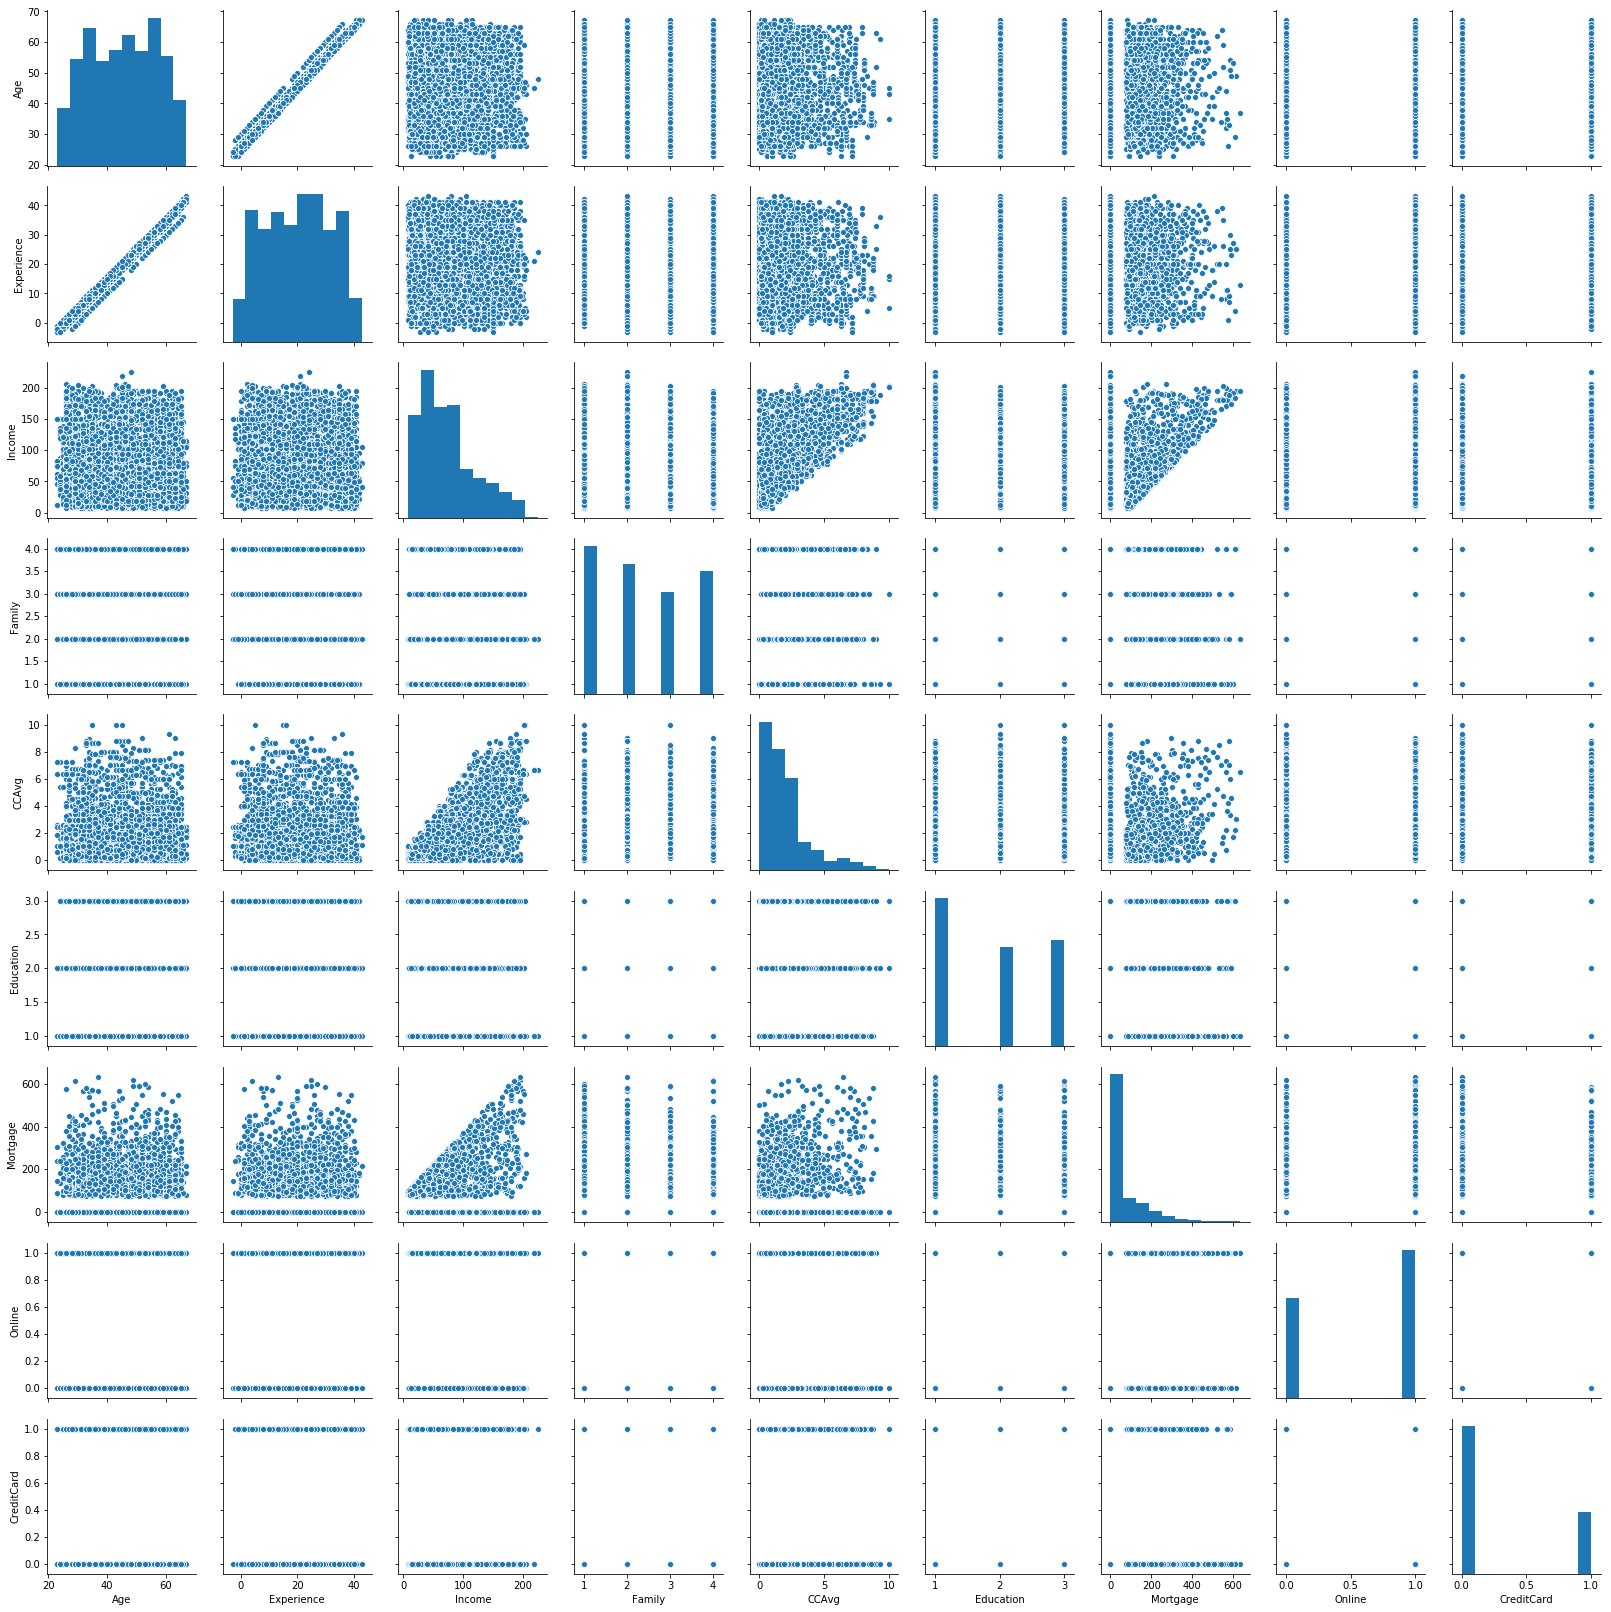

In [98]:
plt = sns.pairplot(df[['Age','Experience','Income','Family','CCAvg' ,'Education' , 'Mortgage', 'Online','CreditCard']] )

Observations:
1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
2. Experience is normally distributed with more customer having experience starting from 8 years.

In [99]:
dfposExp = df.loc[df['Experience'] >0]
mask = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[mask]['ID'].tolist()

In [100]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [101]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

Splitting Data to Train And Test

In [102]:
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("Personal Loan")
test_labels = test_set.pop("Personal Loan")

In [103]:
train_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
test_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000


Naive Bayes

In [105]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9166666666666666

KNN neighbors Classfier

In [106]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [107]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
acc

0.9446297531687792

Confusion matrix

In [108]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


Model Comparision

In [109]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

In [110]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)
